In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## constructing G matrix
rm = []
rm.append(np.ones(32))
rm.append(np.tile([1,0],16))
rm.append(np.tile([1,1,0,0],8))
rm.append(np.tile(np.repeat([1,0],4),4))
rm.append(np.tile(np.repeat([1,0],8),2))
rm.append(np.repeat([1,0],16))

n=32
k=16
# t=10

for i in range(1,6):
	for j in range(i+1,6):
		rm.append(rm[i]^rm[j])
rm = np.array(rm)

In [2]:
print(rm[:,:16].shape)

(16, 16)


In [3]:
samps = 1e5

In [4]:
t = [0.9,1.0,1.1,1.2,1.3]
vals = []
for bound in t:
    count = 0
    for i in range(int(100000)):
        times = np.random.exponential(1,32)
        args = np.argsort(times)
        j=0
        while (np.linalg.matrix_rank(rm[:,args[:16+j]]) != 16):
            j = j+1   
        time_taken = times[args[15+j]]
        if(time_taken > bound):
            count = count+1
    print(count*1.0/100000)
    vals.append(count*1.0/100000)

0.18885
0.09871
0.04763
0.02202
0.00988


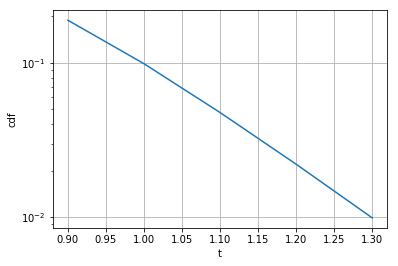

In [6]:
plt.semilogy(t, vals)
plt.xlabel('t')
plt.ylabel('cdf')
plt.grid(True)
plt.show()